<a href="https://colab.research.google.com/github/parkingl1ot/gettylin.github.io/blob/main/MCB/M4%20atmosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 4: Working with spatial data

In this practical we will start to learn how to visualise a spatial dataset using Python. Spatial plotting is very important in environmental sciences as it allows us to visualise the geographic distribution of various environmental data.

The main package for visualising spatial data in python is [CartoPy](https://scitools.org.uk/cartopy/docs/latest/) (*Carto*graphy in *Py*thon).

Unfortunately, Google does not provide CartoPy by default, so the first thing we need to do is install it. This is a bit more complicated than installing other packages, because CartoPy relies on some fairly finnicky packages... Someone has worked out a nice simple way to do it! But it does take a minute or two to complete. You'll have to run this cell every time you restart your notebook.

> **Note**: if you're doing this on your own computer instead of Colab, please install CartoPy using [your favourite method], and skip this step.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -q -c conda-forge cartopy

# You now have Cartopy in your Google Colab environment!

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


CartoPy contains a range of tools for working with **geographic data**, and particularly handling **Coordinate Reference Systems**, or 'map projections'. There's a lot going on in CartoPy and, as always, it's worth taking a look at the [CartoPy Getting Started Guide](https://scitools.org.uk/cartopy/docs/latest/getting_started/index.html) to get a feel for how it works.

In this practical, we're going to make use of two tools within CartoPy:

1. `crs` - a tool for defining the coordinate reference system of a dataset
2. `feature` - a tool for adding features to a map, such as coastlines, borders, etc.

Import these two tools and `matplotlib.pyplot` by running:

```python
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
```

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import the packages here


## Hello World

Now we have the tools to work with spatial data, let's make a world map!

The first thing we want to consider here is what **map projection** we want to use. This is necessary, because the Earth is a sphere, but a computer screen is flat. So we need to 'project' the spherical coordinates of the Earth on to a flat surface. There are many different ways to do this, and each has its own advantages and disadvantages in different parts of the world.

For now, we'll use the `PlateCarree` projection, which should produce a familiar-looking map of the world, because it's very common. Before we can use a projection, we must first define it using the `cartopy.crs` module that you imported above. You can do this by running:

```python
map_projection = ccrs.PlateCarree()
```

Next, you need to create a figure and axis, and tell that axis that you're using the `map_projection` you just defined. You can do this in a few ways... two common ones are:

- creating the figure and axis separately, and setting the `projection` argument.
    ```python
    fig = plt.figure(figsize=(20, 10))
    ax = plt.axes(projection=map_projection)
    ```
- using the `plt.subplots()` with the `subplot_kw` argument, which does this all at once.
    ```python
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
    ```
Once you've created your axis, you can add geographic features to it using the `cartopy.feature` module. For example, to add coastlines, you can run:

```python
ax.add_feature(cfeature.COASTLINE)
```

You can see a complete list of available features [here](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html).

In the cell below, create a map of the world using the `PlateCarree` projection, and add coastlines, land, ocean and country borders to it.

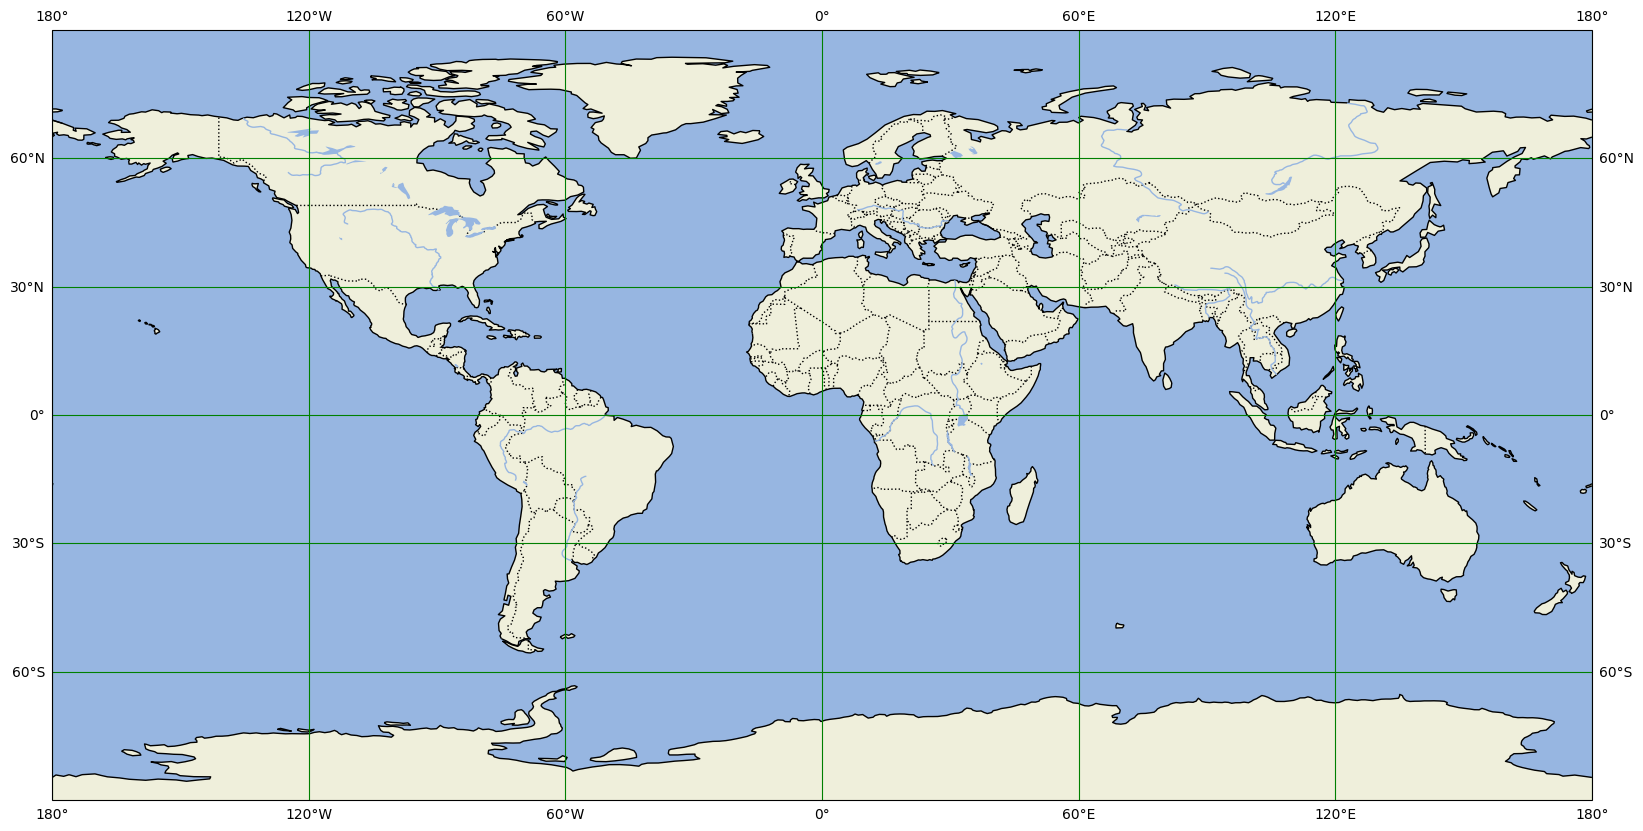

In [ ]:
map_projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)
ax.gridlines(draw_labels=True, color ='g')

# make your figure here


We can also add gridlines and labels to the map using the command `ax.gridlines(draw_labels=True)`. (add these to your plot too... and you'll probably want to change the colour so you can see them!)

## What's in a Projection?

A projection is useful because it allows you to visualise a sphere on a flat surface.
However, it is also dangerous because it must distort the shape of the features on the surface of the.

We can visualise the amount of distortion in caused by a projection using something called the **Tissot Indicatrix**.
This draws a grid of circles on the map, revealing how each circle is distorted by the projection.

This is built in to CartoPy, and you can add it to your plot using the command `ax.tissot()`

Create a map of the world with coastlines and gridlines in the cell below, and add a Tissot Indicatrix to it.

/usr/local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:784: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr/local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:784: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr

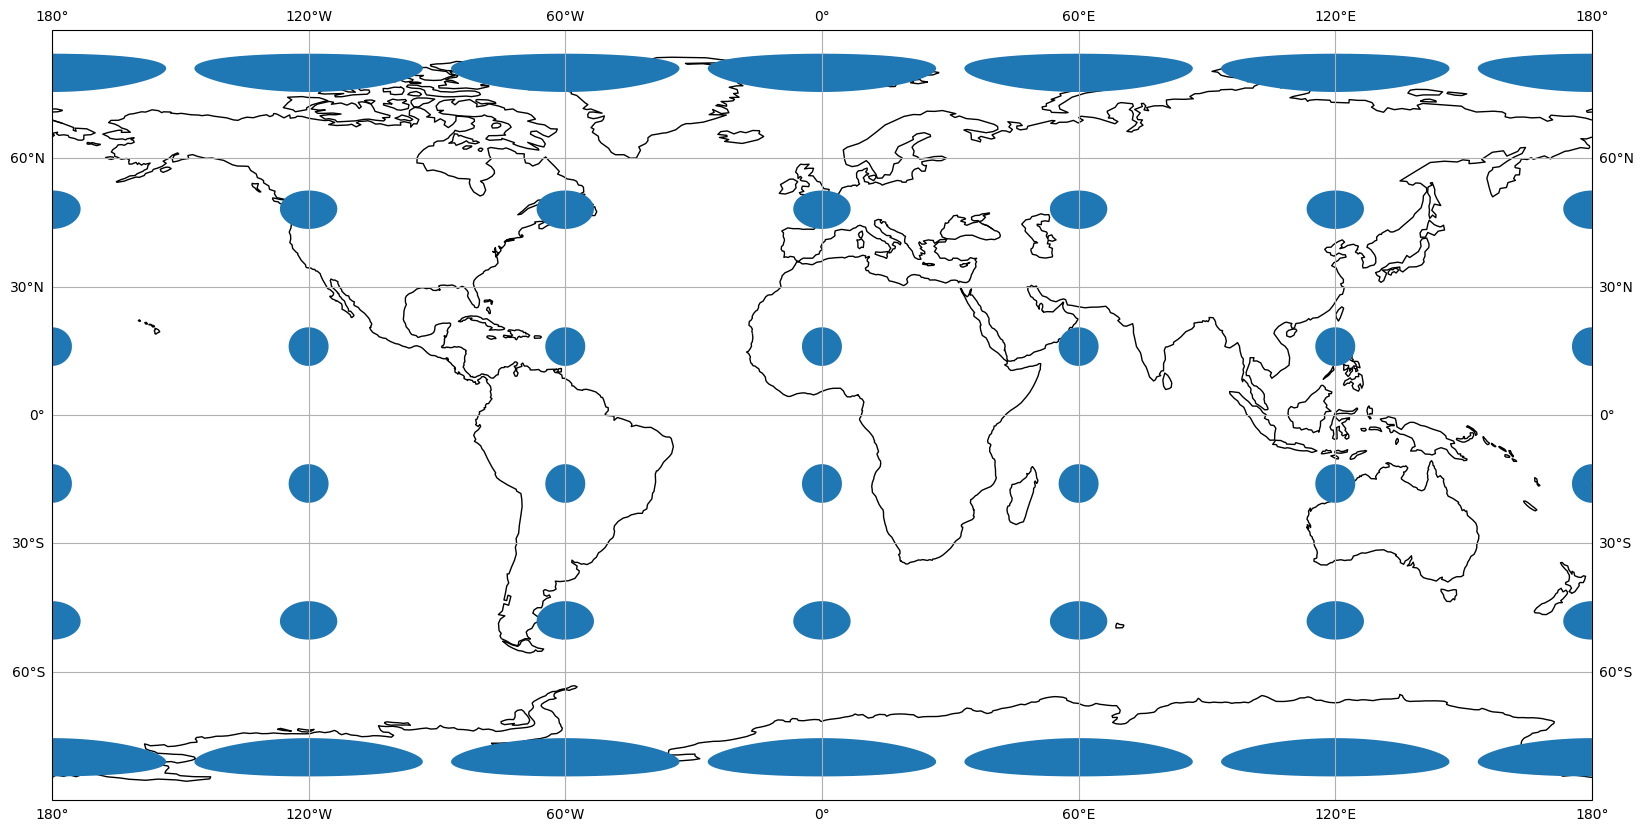

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)
ax.tissot()
# create your map here and add the Tissot Indicatrix


What does this tell you about the PlateCarree projection? If you wanted to represent information in India, would you use it? How about Canada?

Have a look at the [list of CartoPy map projections](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) within cartopy. Try a few out.

How would you pick a map projection based on the area that you are going to be studying?

/usr/local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:784: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr/local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:784: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr

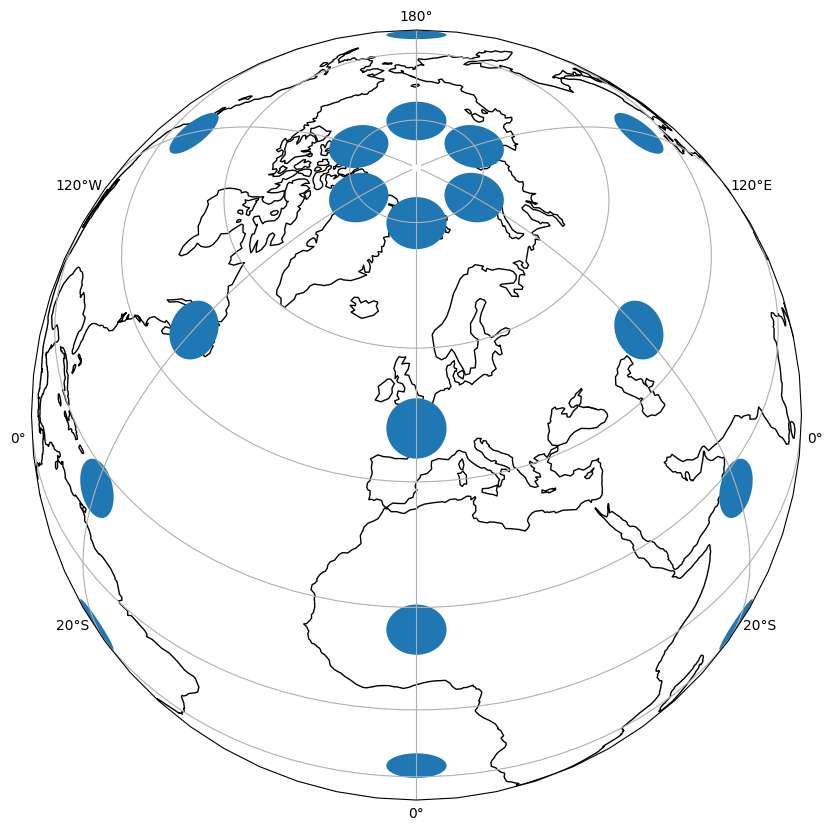

In [ ]:
map_projection = ccrs.Orthographic(central_latitude = 50)
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)
ax.tissot()


In [ ]:
# Try out a few map projections here

## Zooming In

Now we've seen how to make a map of the world, let's zoom in on a smaller area.
You can do this using `ax.set_extent([left, right, bottom, top])`, where `left`, `right`, `bottom` and `top` identify the edges of the map in the target coordinate system.

Choose a suitable map projection, and create a map of the UK in the cell below. A good starting box centered on the UK is `[-12, 5, 49, 61]`, but your map projection will matter here.

Your map should draw the coastlines and have a latitude/longitude grid.

Add county boundaries to your map using the `STATES` feature (cartopy was written by americans...)

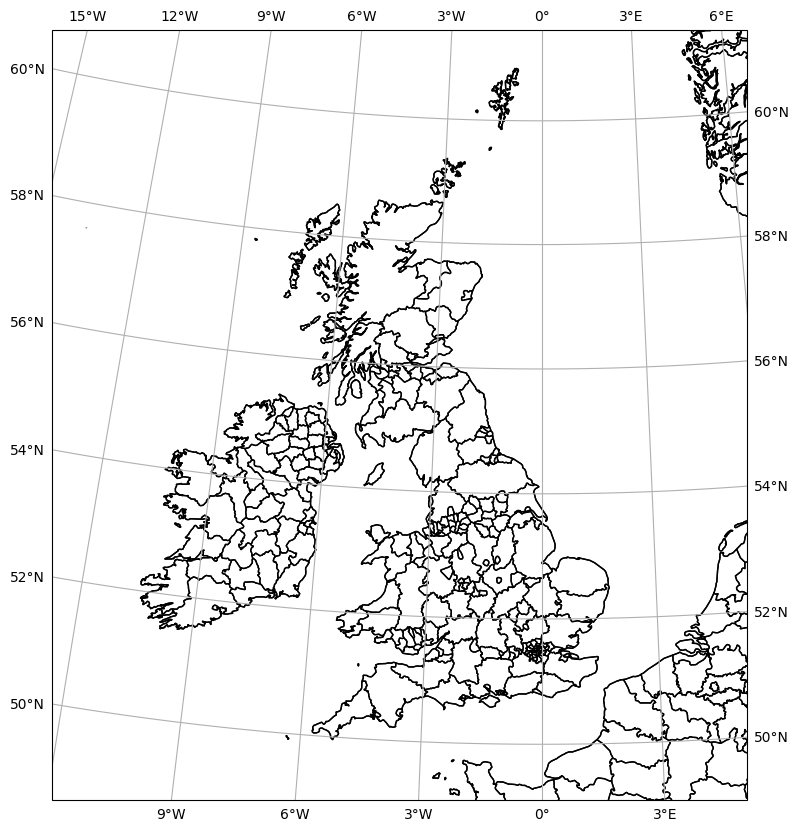

In [ ]:

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.set_extent([-12, 5, 49, 61])
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.STATES)
# create your map here


## Adding Data

Now we have our map, we can start doing interesting things with it. Let's start by adding some data.

Cambridge has a longitude of 0.1313 and a latitude of 52.1951. However, if you try and plot this point on the map with `ax.scatter(0.1313, 52.1951)`, it will not appear *unless the `Axes` are using a latitude/longitude based projection system like `PlateCarree`*.

If the coordinate reference system of the `Axes` does not match the coordinate system of the data you are trying to plot, it will not be plotted correctly. To plot data on the map, we need to tell cartopy the coordinate system of the data, so that it can convert it to the correct coordinate system for plotting.

We do this using the `transform` argument of the plotting commands. You can read more about thiss in the [CartoPy documentation](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html). For example, to plot Cambridge on the map, we would run:

```python
ax.scatter(0.1313, 52.1951, transform=ccrs.PlateCarree())
```

where we're using the `PlateCarree` projection to identify that the data are in latitude and longitude coordinates.

Plot a point on your map at the location of Cambridge, and add a label saying 'Cambridge' using `ax.text()`.

> **Note**: remember during all of this, you can be messing around with the colours of points and text, the size of the points, the size of the text, etc. to make your map look nice. For example, you can use the `color` argument in `text` or `scatter` to set the colour.

Text(0.1313, 52.1951, 'Cambridge')

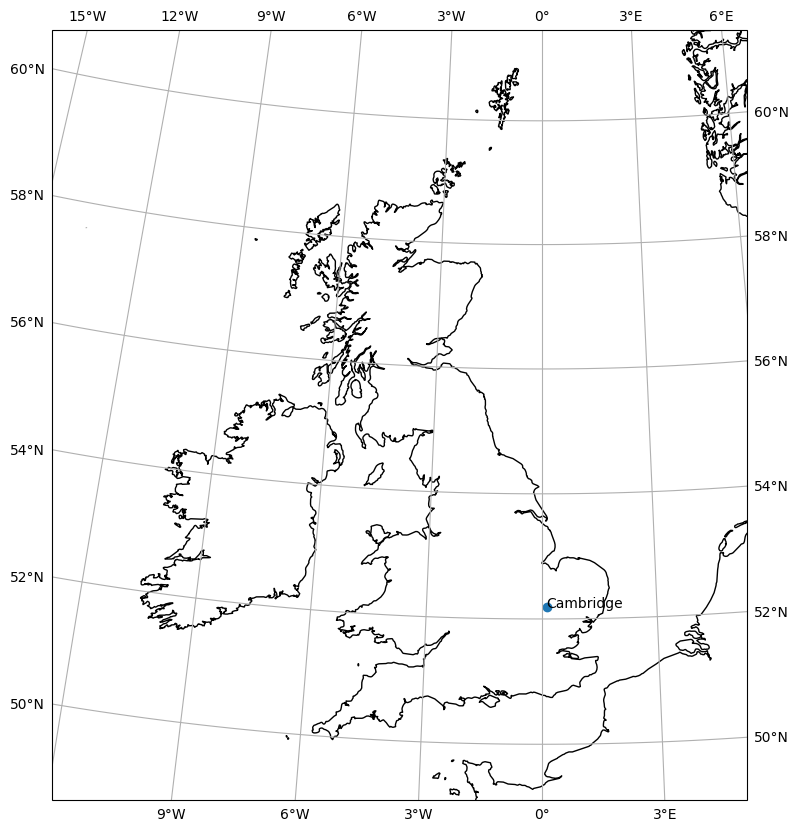

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.set_extent([-12, 5, 49, 61])
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)
ax.scatter(0.1313, 52.1951, transform=ccrs.PlateCarree())
ax.text(0.1313, 52.1951, 'Cambridge', transform=ccrs.PlateCarree())

# create your map here, with the location of Cambride marked


## Adding a Dataset

What if we have some environmental data that we want to plot on the map? Let's try it out.

You can find a dataset of nitrate concentrations in rivers throughout England [here](https://raw.githubusercontent.com/Quantitative-Environmental-Science/data/main/data/M4_river_nitrate.csv).

Import this dataset using `pandas`, and take a look at the data.

In [ ]:
import pandas as pd
nitrate_data= pd.read_csv("https://raw.githubusercontent.com/Quantitative-Environmental-Science/data/main/data/M4_river_nitrate.csv", sep= ",", comment='#')
nitrate_data
# load the data here

,Date,Time,determinand.label,result,determinand.unit.label,sample.sampledMaterialType.label,easting,northing
0,24/05/2021,10:43:00,Nitrate-N,8.660,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
1,23/06/2021,10:30:00,Nitrate-N,5.540,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
2,14/07/2021,13:32:00,Nitrate-N,5.040,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
3,04/08/2021,13:20:00,Nitrate-N,4.580,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
4,07/09/2021,09:19:00,Nitrate-N,7.360,mg/l,RIVER / RUNNING SURFACE WATER,463800,241400
...,...,...,...,...,...,...,...,...
35221,05/05/2021,10:21:00,Nitrate-N,4.580,mg/l,RIVER / RUNNING SURFACE WATER,503214,154352
35222,17/06/2021,11:08:00,Nitrate-N,1.190,mg/l,RIVER / RUNNING SURFACE WATER,503214,154352
35223,04/08/2021,12:09:00,Nitrate-N,0.852,mg/l,RIVER / RUNNING SURFACE WATER,503214,154352
35224,23/09/2021,10:54:00,Nitrate-N,0.716,mg/l,RIVER / RUNNING SURFACE WATER,503214,154352


Notice that the data do not contain any 'latitude' or 'longitude' columns... so how will we plot this data? This is another example of a new Coordinate Reference System!

This dataset maps the data using Ordinance Survey grid references - six-figure `easting` and `northing` numbers that identify location on a grid that is specific to the UK. You can read more about this coordinate system [here](https://en.wikipedia.org/wiki/Ordnance_Survey_National_Grid).

CartoPy can handle this projection, and calls it the `crs.OSGB()` projection.

Plot the nitrate data in the `result` column on your map of the UK. To do this, you'll need to:
1. Use the `ax.scatter(..., transform=crs.OSGB())` command to plot the data.#
2. Use 'easting` and `northing` columns of the dataset as the x and y coordinates of the scatter plot.
3. Use the `c` argument to set the colour of the points based on the `result` column.
4. Change the extent so you zoom in on the data.

> **Hint**: You might want to set the `vmin` and `vmax` arguments to specify the lower and upper limits of the colour scale so you can see the variation in the data. This is the equivalent of setting the x or y axis limits, but for the colour scale. You might also want to change the size of the scatter points using the `s` argument.


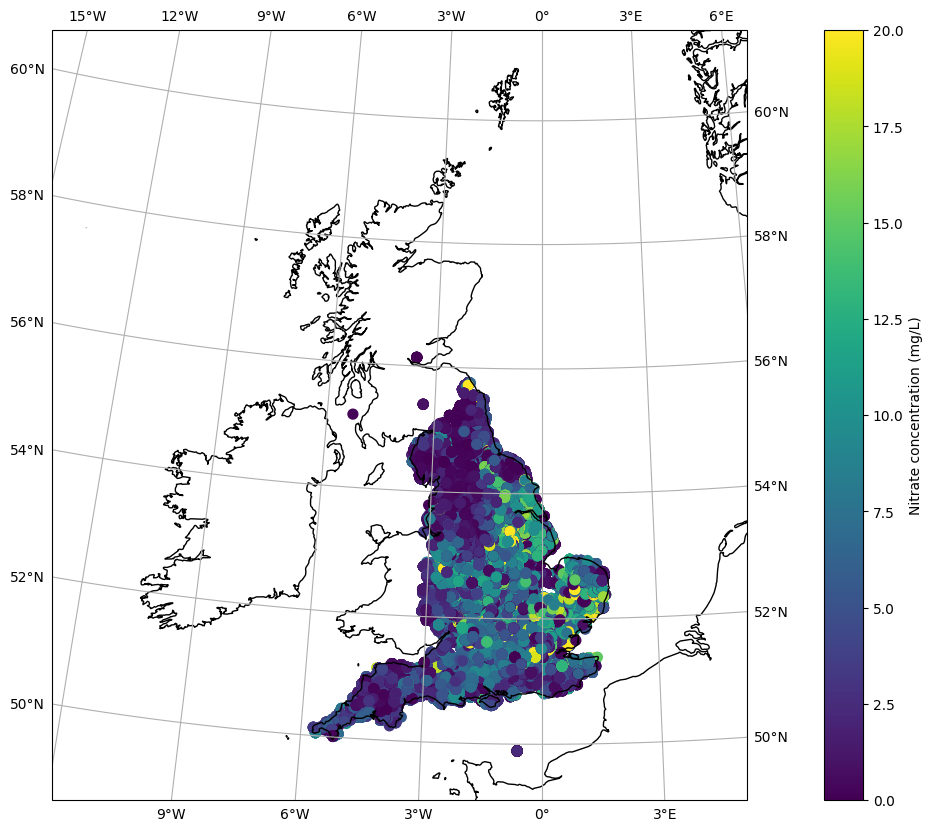

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.set_extent([-12, 5, 49, 61])
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)
n= ax.scatter(nitrate_data.easting, nitrate_data.northing, transform=ccrs.OSGB(), c=nitrate_data.result,vmin=0, vmax=20, s=50)
fig.colorbar(n, label='Nitrate concentration (mg/L)')

# create plot here


Finally, add a colour scale (`colourbar`) to your figure to link concentration to colour. This involves a new piece of matplotlib, which you can read about [here](https://matplotlib.org/stable/gallery/color/colorbar_basics.html).

Briefly, you create a colourbar on a figure using `fig.colorbar` function. To create a colourbar, you need to tell the function *what the colourbar relates to*.
To do this, you need to *save* the result of your `ax.scatter` command to a variable, and then pass that variable to the `fig.colorbar` function.
For example:
```
points = ax.scatter(x, y, c=z)
fig.colorbar(points, label='Some colours that represent z')
```

Add a colourbar to your plot in the cell above.

## Extension: Data Subsets

You will notice that there is a *lot* of data on the plot above. So much, that it's difficult to tell what's going on.

This may be because the dataset contains measurements from the *whole* of 2021. Given the seasonal variation in rainfall and river flow-rates in the UK, this probably isn't sensible... what's the value of plotting a measurement from a wet winter next to a data point from a dry summer? They will obviously be different!

Instead, we might want to visualise data from a particular season, or month, or week. To do this, we need to *subset* the data.

To do this, we first need to make sure the `Date` column of the dataset has been interpreted correctly. You can check if it has by looking at the `dtype` of the column. If it is not a `datetime` object, you can convert it using `pd.to_datetime()`. (Don't worry if this is confusing - we'll revisit in later practicals)

Convert the `Date` column to a `datetime` object in the cell below, and overwrite the values in the `Date` column with the new values.

In [ ]:
nitrate_data.Date = pd.to_datetime(nitrate_data.Date)
nitrate_data.Date.dtype

# do it here


dtype('<M8[ns]')

Now `pandas` knows this column contains dates, we can use that column to do some more advanced data selection.

For example, you can select all the data from January using:

```python
my_dataframe.Date.dt.month == 1
```

where `dt` is a special attribute of the `datetime` column that allows you to access the month, day, year, etc. of the date.

Select all the data from April, and plot that data on a map of the UK. Have a look at some other months - do the patterns change?

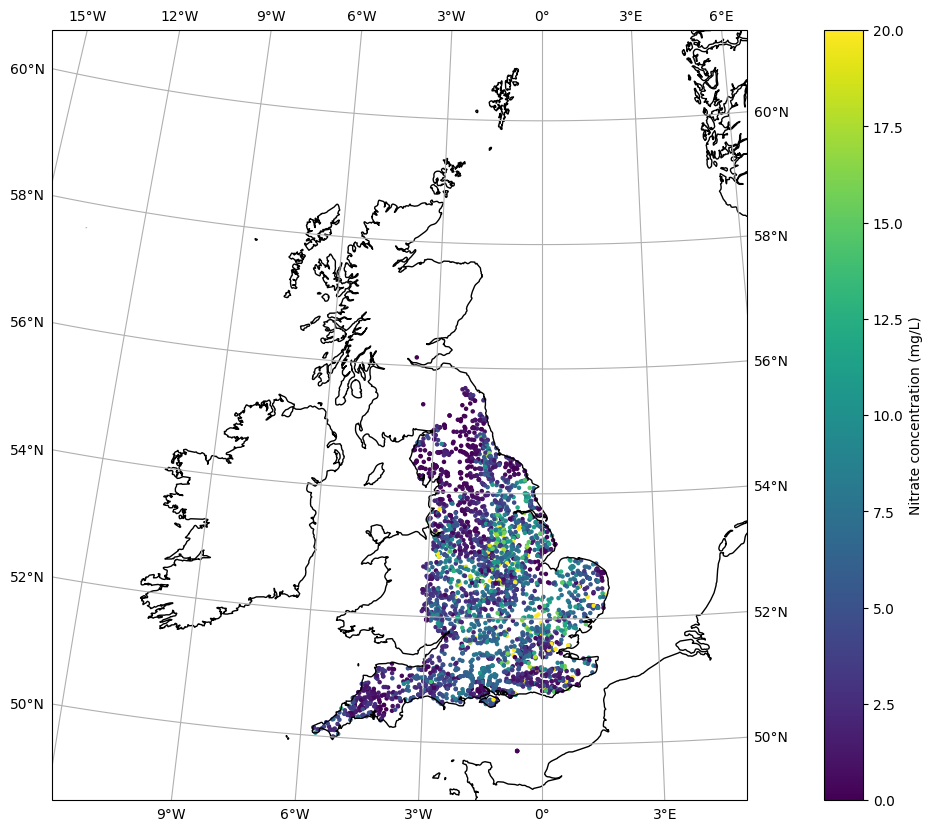

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': map_projection})
ax.set_extent([-12, 5, 49, 61])
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)
n_4= nitrate_data[nitrate_data.Date.dt.month == 6]
n= ax.scatter(n_4.easting, n_4.northing, transform=ccrs.OSGB(), c=n_4.result,vmin=0, vmax=20, s=5)
fig.colorbar(n, label='Nitrate concentration (mg/L)')

# create plot here
